In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("household_power_consumption.txt",delimiter=";")

In [4]:
data.head(10)

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   
5  16/12/2006  17:29:00               3.520                 0.522  235.020   
6  16/12/2006  17:30:00               3.702                 0.520  235.090   
7  16/12/2006  17:31:00               3.700                 0.520  235.220   
8  16/12/2006  17:32:00               3.668                 0.510  233.990   
9  16/12/2006  17:33:00               3.662                 0.510  233.860   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
5           15.000          0.000          2.000            17.0  
6           15.800          0.000          1.000            17.0  
7           15.800          0.000          1.000            17.0  
8           15.800          0.000          1.000            17.0  
9           15.800          0.000          2.000            16.0

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

In [6]:
data.columns[0]

'Date'

In [7]:
data.to_csv("household.csv")

In [8]:
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


### To Find Duplicates:

In [11]:
data.duplicated().sum()

0

### To Find Null Values:

In [13]:
 data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
data.replace('?', pd.NA, inplace=True)

In [15]:
 data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [16]:
25979/2075259*100

1.2518437457686005

In [17]:
data_cleaned = data.dropna()

In [18]:
data_cleaned.shape

(2049280, 9)

In [19]:
data_cleaned.shape

(2049280, 9)

In [20]:
25979/2075259 *100

1.2518437457686005

In [21]:
zero=(data_cleaned==0).sum()

In [22]:
zero

Date                           0
Time                           0
Global_active_power            0
Global_reactive_power     481561
Voltage                        0
Global_intensity               0
Sub_metering_1           1880175
Sub_metering_2           1436830
Sub_metering_3            852092
dtype: int64

### EDA:

In [24]:
data_cleaned["Month"] = data_cleaned["Date"].dt.month
data_cleaned["Year"] = data_cleaned["Date"].dt.year
data_cleaned["Day"] = data_cleaned["Date"].dt.day

In [25]:
data_cleaned.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Month  \
0              18.4             0.0             1.0            17.0     12   
1              23.0             0.0             1.0            16.0     12   
2              23.0             0.0             2.0            17.0     12   
3              23.0             0.0             1.0            17.0     12   
4              15.8             0.0             1.0            17.0     12   

   Year  Day  
0  2006   16  
1  2006   16  
2  2006   16  
3  2006   16  
4  2006   16

In [26]:
#Daily Average:

In [27]:
Daily_Avg = data_cleaned.groupby('Date')['Global_active_power'].mean().reset_index()
Daily_Avg.rename(columns={'Global_active_power': 'Daily_Avg_Power'}, inplace=True)

In [28]:
Daily_Avg

Date  Daily_Avg_Power
0    2006-12-16         3.053475
1    2006-12-17         2.354486
2    2006-12-18         1.530435
3    2006-12-19         1.157079
4    2006-12-20         1.545658
...         ...              ...
1428 2010-11-22         1.417733
1429 2010-11-23         1.095511
1430 2010-11-24         1.247394
1431 2010-11-25         0.993864
1432 2010-11-26         1.178230

[1433 rows x 2 columns]

In [29]:
data_cleaned = pd.merge(data_cleaned,Daily_Avg , on='Date')

In [30]:
data_cleaned

Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                4.216                  0.418   
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
4       2006-12-16  17:28:00                3.666                  0.528   
...            ...       ...                  ...                    ...   
2049275 2010-11-26  20:58:00                0.946                  0.000   
2049276 2010-11-26  20:59:00                0.944                  0.000   
2049277 2010-11-26  21:00:00                0.938                  0.000   
2049278 2010-11-26  21:01:00                0.934                  0.000   
2049279 2010-11-26  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2049275   240.43               4.0             0.0             0.0   
2049276   240.00               4.0             0.0             0.0   
2049277   239.82               3.8             0.0             0.0   
2049278   239.70               3.8             0.0             0.0   
2049279   239.55               3.8             0.0             0.0   

         Sub_metering_3  Month  Year  Day  Daily_Avg_Power  
0                  17.0     12  2006   16         3.053475  
1                  16.0     12  2006   16         3.053475  
2                  17.0     12  2006   16         3.053475  
3                  17.0     12  2006   16         3.053475  
4                  17.0     12  2006   16         3.053475  
...                 ...    ...   ...  ...              ...  
2049275             0.0     11  2010   26         1.178230  
2049276             0.0     11  2010   26         1.178230  
2049277             0.0     11  2010   26         1.178230  
2049278             0.0     11  2010   26         1.178230  
2049279             0.0     11  2010   26         1.178230  

[2049280 rows x 13 columns]

In [31]:
#Peak hours:

In [32]:
data_cleaned['Hour'] = pd.to_datetime(data_cleaned['Time'], format='%H:%M:%S').dt.hour

In [33]:
data_cleaned.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Month  \
0              18.4             0.0             1.0            17.0     12   
1              23.0             0.0             1.0            16.0     12   
2              23.0             0.0             2.0            17.0     12   
3              23.0             0.0             1.0            17.0     12   
4              15.8             0.0             1.0            17.0     12   

   Year  Day  Daily_Avg_Power  Hour  
0  2006   16         3.053475    17  
1  2006   16         3.053475    17  
2  2006   16         3.053475    17  
3  2006   16         3.053475    17  
4  2006   16         3.053475    17

In [34]:
# Filter and calculate average power during peak hours
peak_hours = data_cleaned[
    (data_cleaned['Hour'] >= 18) & 
    (data_cleaned['Hour'] <= 23) & 
    (data_cleaned['Date'] >= '2006-12-16') & 
    (data_cleaned['Date'] <= '2010-11-26')
]
peak_avg = peak_hours.groupby(['Date', 'Hour'])['Global_active_power'].mean().reset_index()
peak_avg.rename(columns={'Global_active_power': 'Peak_Hour_Avg_Power'}, inplace=True)

In [35]:
peak_avg

Date  Hour  Peak_Hour_Avg_Power
0    2006-12-16    18             3.632200
1    2006-12-16    19             3.400233
2    2006-12-16    20             3.268567
3    2006-12-16    21             3.056467
4    2006-12-16    22             2.200133
...         ...   ...                  ...
8553 2010-11-25    23             0.957000
8554 2010-11-26    18             1.573467
8555 2010-11-26    19             1.659333
8556 2010-11-26    20             1.163700
8557 2010-11-26    21             0.934667

[8558 rows x 3 columns]

In [36]:
data_cleaned = pd.merge(data_cleaned,peak_avg , on=['Date', 'Hour'], how='left')

In [37]:
data_cleaned.head(5)

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Month  \
0              18.4             0.0             1.0            17.0     12   
1              23.0             0.0             1.0            16.0     12   
2              23.0             0.0             2.0            17.0     12   
3              23.0             0.0             1.0            17.0     12   
4              15.8             0.0             1.0            17.0     12   

   Year  Day  Daily_Avg_Power  Hour  Peak_Hour_Avg_Power  
0  2006   16         3.053475    17                  NaN  
1  2006   16         3.053475    17                  NaN  
2  2006   16         3.053475    17                  NaN  
3  2006   16         3.053475    17                  NaN  
4  2006   16         3.053475    17                  NaN

In [38]:
data_cleaned.isnull().sum()

Date                           0
Time                           0
Global_active_power            0
Global_reactive_power          0
Voltage                        0
Global_intensity               0
Sub_metering_1                 0
Sub_metering_2                 0
Sub_metering_3                 0
Month                          0
Year                           0
Day                            0
Daily_Avg_Power                0
Hour                           0
Peak_Hour_Avg_Power      1536134
dtype: int64

In [39]:
data_cleaned["Peak_Hour_Avg_Power"].fillna(0,inplace=True) 

In [40]:
data_cleaned.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Month                    0
Year                     0
Day                      0
Daily_Avg_Power          0
Hour                     0
Peak_Hour_Avg_Power      0
dtype: int64

In [41]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Month                  int32         
 10  Year                   int32         
 11  Day                    int32         
 12  Daily_Avg_Power        float64       
 13  Hour                   int32         
 14  Peak_Hour_Avg_Power    float64       
dtypes: datetime64[ns](1), float64(9), int32(4), object(1)
memory usage: 203.3+ MB


In [42]:
data_cleaned.to_csv("data_clean")

## Data Visualization:

### Histogram:

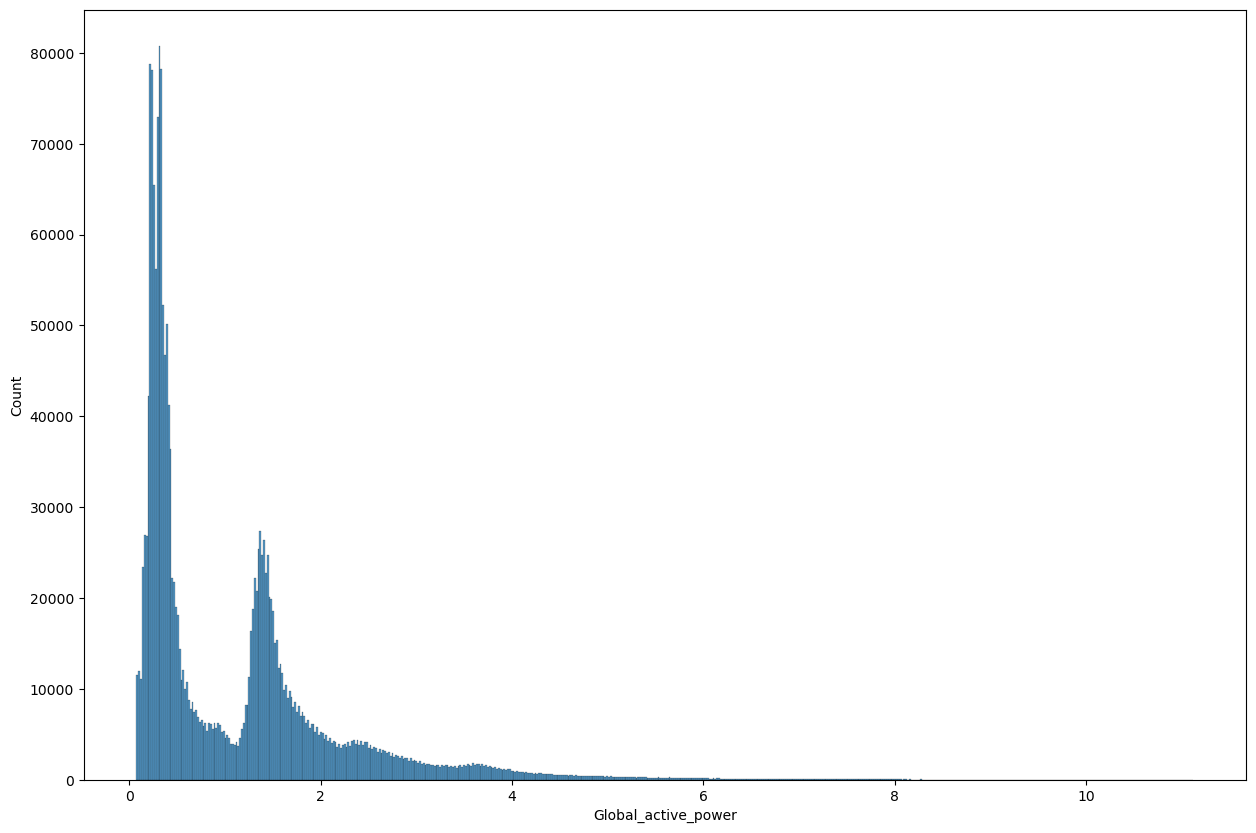

In [45]:

plt.figure(figsize = (15,10))
sns.histplot(data=data_cleaned, x="Global_active_power")
plt.show() # To remove the Axes

Text(0.5, 1.0, 'Histogram')

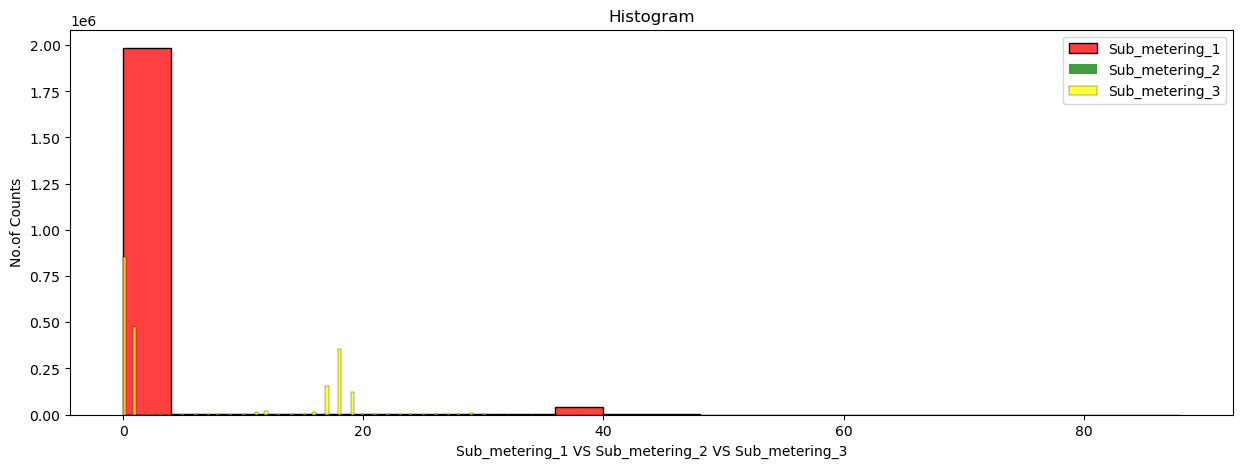

In [46]:
#Comparing the plots:
plt.figure(figsize = (15,5))
sns.histplot(data=data_cleaned, x="Sub_metering_1",color = "red",label = "Sub_metering_1")
sns.histplot(data=data_cleaned,x="Sub_metering_2",color = "green",label = "Sub_metering_2")
sns.histplot(data=data_cleaned,x="Sub_metering_3",color = "yellow",label = "Sub_metering_3")
plt.legend()
plt.xlabel("Sub_metering_1 VS Sub_metering_2 VS Sub_metering_3")
plt.ylabel("No.of Counts")
plt.title("Histogram")

### Scatter Plot:

Text(0.5, 1.0, 'Scatterplot')

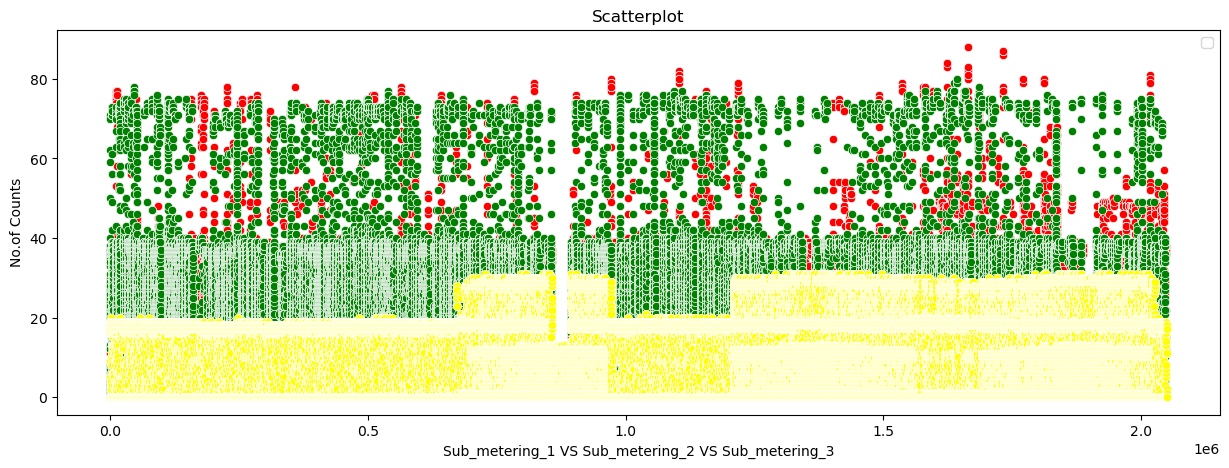

In [48]:

plt.figure(figsize = (15,5))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Sub_metering_1'], color = "red")
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Sub_metering_2'], color = "green")
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Sub_metering_3'], color = "yellow")
plt.legend()
plt.xlabel("Sub_metering_1 VS Sub_metering_2 VS Sub_metering_3")
plt.ylabel("No.of Counts")
plt.title("Scatterplot")

### Line Chart:

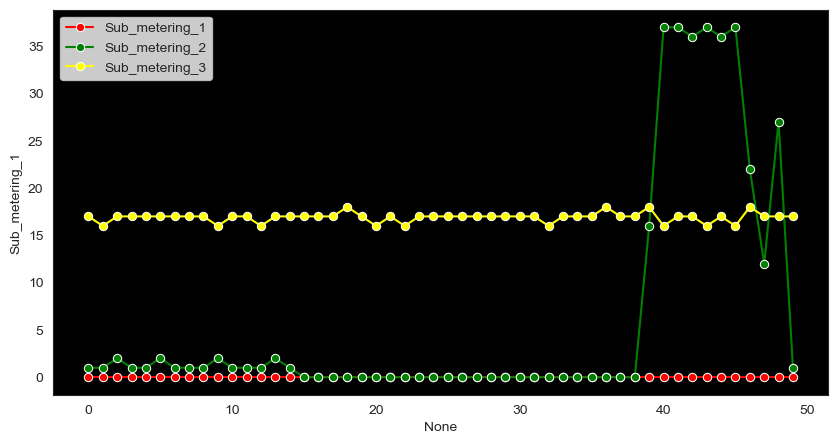

In [50]:

sns.set_style('white')
fig, axes = plt.subplots(figsize = (10,5))
axes.set_facecolor("black")
sns.lineplot(x=data_cleaned.head(50).index, y=data_cleaned['Sub_metering_1'].head(50), color = "red", marker="o", label="Sub_metering_1")
sns.lineplot(x=data_cleaned.head(50).index, y=data_cleaned['Sub_metering_2'].head(50), color = "GREEN", marker="o", label="Sub_metering_2")
sns.lineplot(x=data_cleaned.head(50).index, y=data_cleaned['Sub_metering_3'].head(50), color = "YELLOW", marker="o", label="Sub_metering_3")
plt.show()

### Piechart:

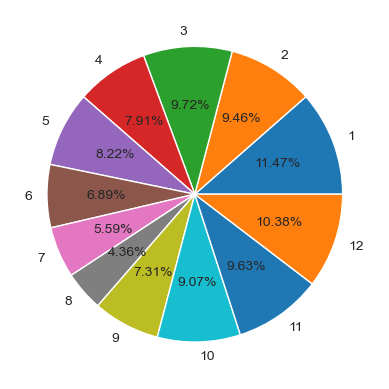

In [52]:
#Monthwise - Global_active_power
monthwise1 = data_cleaned.groupby(["Month"])["Global_active_power"].sum()
plt.pie(monthwise1.values,labels=monthwise1.index,autopct='%1.2f%%' )
plt.show()

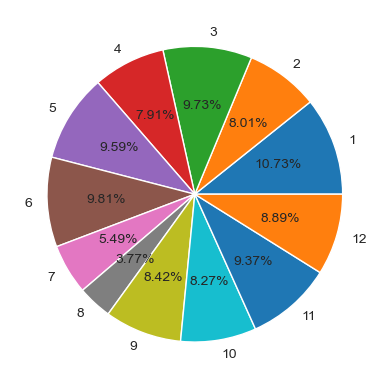

In [53]:
#Monthwise - Sub_metering_1
monthwise2 = data_cleaned.groupby(["Month"])["Sub_metering_1"].sum()
plt.pie(monthwise2.values,labels=monthwise2.index,autopct='%1.2f%%' )
plt.show()

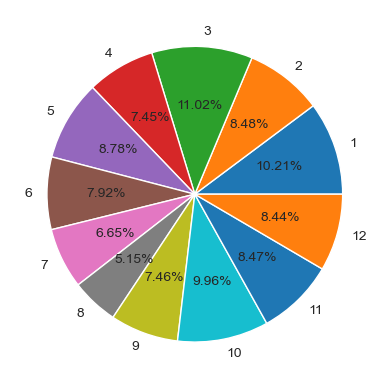

In [54]:
#Monthwise - Sub_metering_2
monthwise3 = data_cleaned.groupby(["Month"])["Sub_metering_2"].sum()
plt.pie(monthwise3.values,labels=monthwise3.index,autopct='%1.2f%%' )
plt.show()

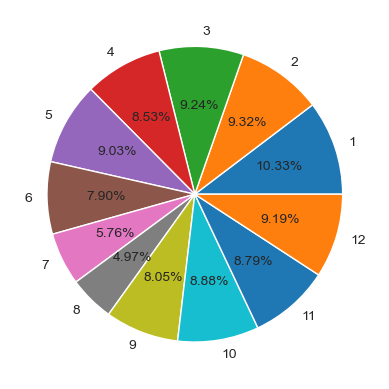

In [55]:
#Monthwise - Sub_metering_3
monthwise4 = data_cleaned.groupby(["Month"])["Sub_metering_3"].sum()
plt.pie(monthwise4.values,labels=monthwise4.index,autopct='%1.2f%%' )
plt.show()

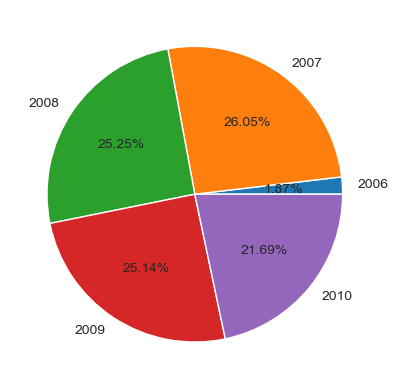

In [56]:
# Year-Wise - Global_active_power
year_wise1 = data_cleaned.groupby(["Year"])["Global_active_power"].sum()
plt.pie(year_wise1.values,labels=year_wise1.index,autopct='%1.2f%%' )
plt.show()

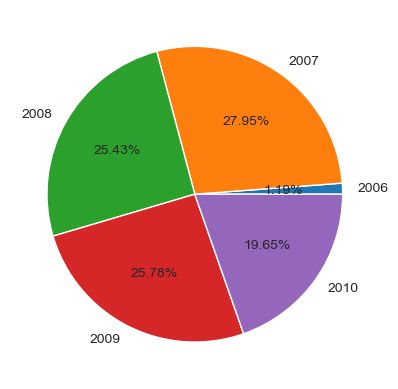

In [57]:
# Year-Wise - Sub_metering_1
year_wise2 = data_cleaned.groupby(["Year"])["Sub_metering_1"].sum()
plt.pie(year_wise2.values,labels=year_wise2.index,autopct='%1.2f%%' )
plt.show()

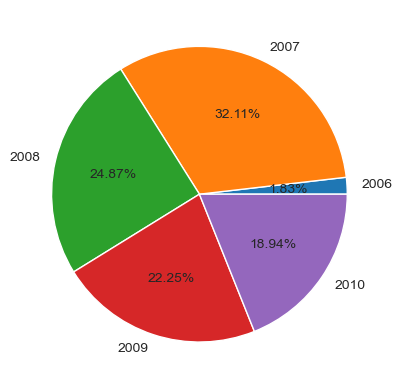

In [58]:
# Year-Wise - Sub_metering_2
year_wise3 = data_cleaned.groupby(["Year"])["Sub_metering_2"].sum()
plt.pie(year_wise3.values,labels=year_wise3.index,autopct='%1.2f%%' )
plt.show()

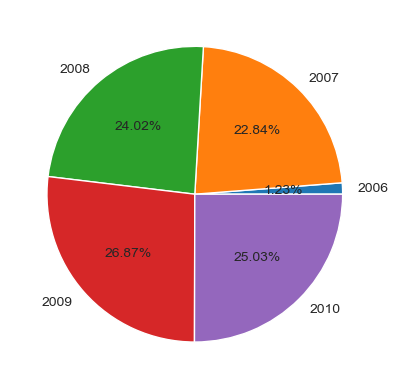

In [59]:
# Year-Wise - Sub_metering_3
year_wise4 = data_cleaned.groupby(["Year"])["Sub_metering_3"].sum()
plt.pie(year_wise4.values,labels=year_wise4.index,autopct='%1.2f%%' )
plt.show()

### Bar Plot:

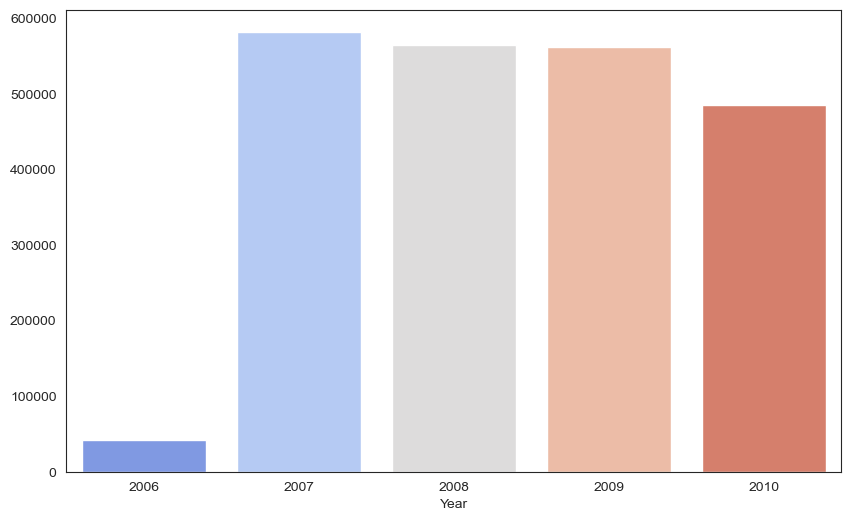

In [61]:
# For Global_active_power
plt.figure(figsize=(10,6))
sns.barplot(x=year_wise1.index, y=year_wise1.values, palette = "coolwarm") 
plt.show()

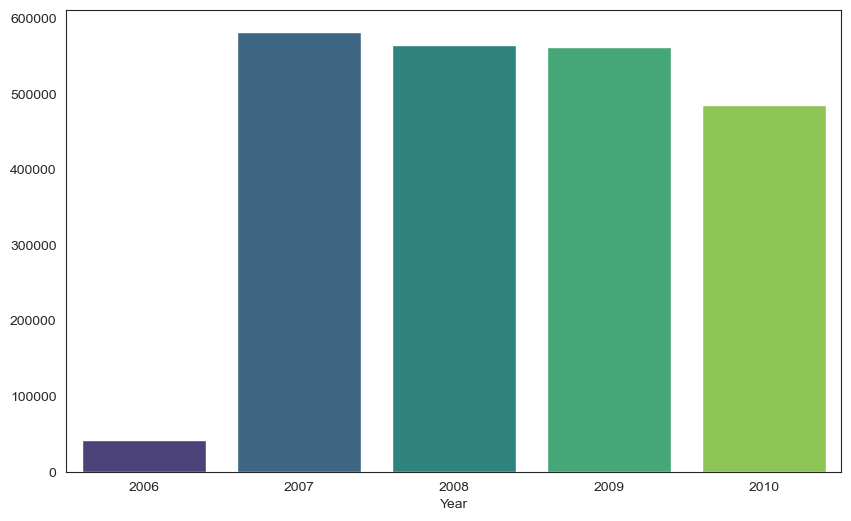

In [62]:
#For Sub_metering_1
plt.figure(figsize=(10,6))
sns.barplot(x=year_wise2.index, y=year_wise1.values, palette = "viridis")
plt.show()

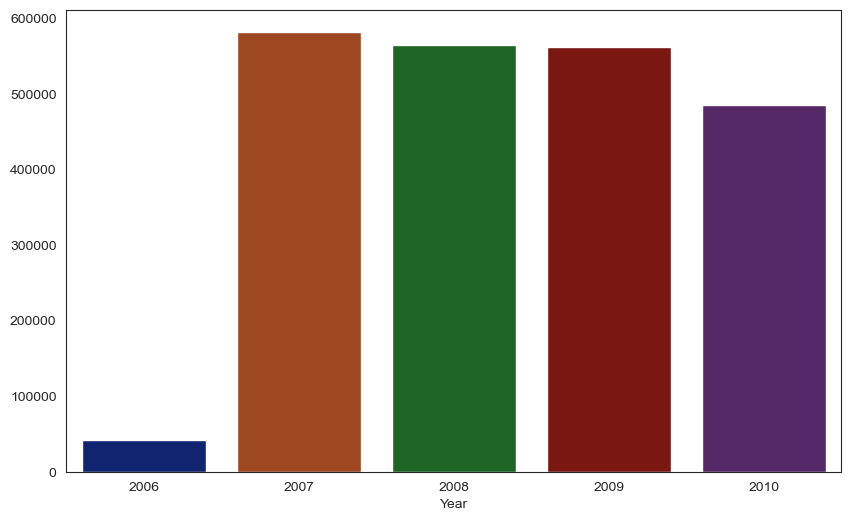

In [63]:
#For Sub_metering_2
plt.figure(figsize=(10,6))
sns.barplot(x=year_wise3.index, y=year_wise1.values, palette = "dark")
plt.show()

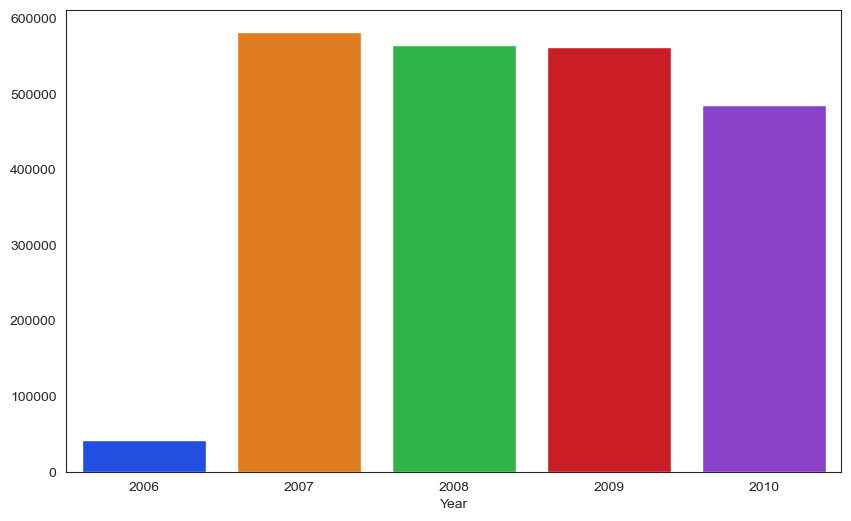

In [64]:
#For Sub_metering_3
plt.figure(figsize=(10,6))
sns.barplot(x=year_wise4.index, y=year_wise1.values, palette = "bright")
plt.show()

### 3D Scatter Plot:

In [66]:
data_3d=data_cleaned.head(5000)

In [67]:

fig=px.scatter_3d(

    data_3d,
    x="Sub_metering_1",
    y="Sub_metering_2",
    z="Sub_metering_3",
    color = "Date"
)
fig.show()

### Heatmap:

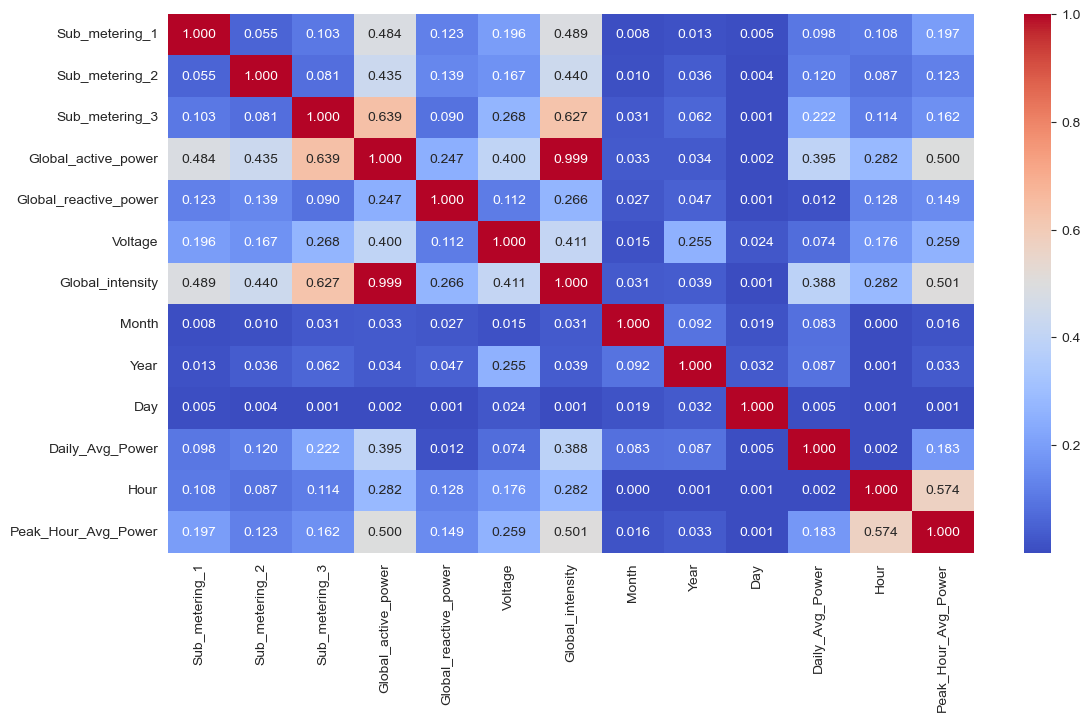

In [69]:
data_heat = data_cleaned[["Sub_metering_1","Sub_metering_2","Sub_metering_3","Global_active_power","Global_reactive_power","Voltage","Global_intensity","Month","Year","Day","Daily_Avg_Power","Hour","Peak_Hour_Avg_Power"]]
data_corr=data_heat.corr()
plt.figure(figsize = (13,7))
sns.heatmap(abs(data_corr), annot = True, cmap ="coolwarm", fmt='.3f') 
plt.show()

In [70]:
# Removing Global intensity as Global_active_power and Global intensity are highly correlated.

In [71]:
data_cleaned.columns 

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Month', 'Year', 'Day', 'Daily_Avg_Power', 'Hour',
       'Peak_Hour_Avg_Power'],
      dtype='object')

In [72]:
col_removed = ["Date", "Time","Global_intensity"]

In [73]:
data_ML=data_cleaned.drop(col_removed, axis=1)

In [74]:
data_ML

Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
0                      4.216                  0.418   234.84             0.0   
1                      5.360                  0.436   233.63             0.0   
2                      5.374                  0.498   233.29             0.0   
3                      5.388                  0.502   233.74             0.0   
4                      3.666                  0.528   235.68             0.0   
...                      ...                    ...      ...             ...   
2049275                0.946                  0.000   240.43             0.0   
2049276                0.944                  0.000   240.00             0.0   
2049277                0.938                  0.000   239.82             0.0   
2049278                0.934                  0.000   239.70             0.0   
2049279                0.932                  0.000   239.55             0.0   

         Sub_metering_2  Sub_metering_3  Month  Year  Day  Daily_Avg_Power  \
0                   1.0            17.0     12  2006   16         3.053475   
1                   1.0            16.0     12  2006   16         3.053475   
2                   2.0            17.0     12  2006   16         3.053475   
3                   1.0            17.0     12  2006   16         3.053475   
4                   1.0            17.0     12  2006   16         3.053475   
...                 ...             ...    ...   ...  ...              ...   
2049275             0.0             0.0     11  2010   26         1.178230   
2049276             0.0             0.0     11  2010   26         1.178230   
2049277             0.0             0.0     11  2010   26         1.178230   
2049278             0.0             0.0     11  2010   26         1.178230   
2049279             0.0             0.0     11  2010   26         1.178230   

         Hour  Peak_Hour_Avg_Power  
0          17             0.000000  
1          17             0.000000  
2          17             0.000000  
3          17             0.000000  
4          17             0.000000  
...       ...                  ...  
2049275    20             1.163700  
2049276    20             1.163700  
2049277    21             0.934667  
2049278    21             0.934667  
2049279    21             0.934667  

[2049280 rows x 12 columns]

## Target is Daily_Avg_Power

### Linear Regression:

In [79]:
#Split data into value & target:
val=data_ML.drop("Daily_Avg_Power",axis=1)

In [80]:
val

Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
0                      4.216                  0.418   234.84             0.0   
1                      5.360                  0.436   233.63             0.0   
2                      5.374                  0.498   233.29             0.0   
3                      5.388                  0.502   233.74             0.0   
4                      3.666                  0.528   235.68             0.0   
...                      ...                    ...      ...             ...   
2049275                0.946                  0.000   240.43             0.0   
2049276                0.944                  0.000   240.00             0.0   
2049277                0.938                  0.000   239.82             0.0   
2049278                0.934                  0.000   239.70             0.0   
2049279                0.932                  0.000   239.55             0.0   

         Sub_metering_2  Sub_metering_3  Month  Year  Day  Hour  \
0                   1.0            17.0     12  2006   16    17   
1                   1.0            16.0     12  2006   16    17   
2                   2.0            17.0     12  2006   16    17   
3                   1.0            17.0     12  2006   16    17   
4                   1.0            17.0     12  2006   16    17   
...                 ...             ...    ...   ...  ...   ...   
2049275             0.0             0.0     11  2010   26    20   
2049276             0.0             0.0     11  2010   26    20   
2049277             0.0             0.0     11  2010   26    21   
2049278             0.0             0.0     11  2010   26    21   
2049279             0.0             0.0     11  2010   26    21   

         Peak_Hour_Avg_Power  
0                   0.000000  
1                   0.000000  
2                   0.000000  
3                   0.000000  
4                   0.000000  
...                      ...  
2049275             1.163700  
2049276             1.163700  
2049277             0.934667  
2049278             0.934667  
2049279             0.934667  

[2049280 rows x 11 columns]

In [81]:
tar=data_ML["Daily_Avg_Power"]

In [82]:
tar

0          3.053475
1          3.053475
2          3.053475
3          3.053475
4          3.053475
             ...   
2049275    1.178230
2049276    1.178230
2049277    1.178230
2049278    1.178230
2049279    1.178230
Name: Daily_Avg_Power, Length: 2049280, dtype: float64

In [83]:
train_test_split(val, tar, test_size=0.20,random_state=67)

[         Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
 1486814                0.252                  0.048   246.80             0.0   
 1895892                1.428                  0.098   241.65             0.0   
 1156325                1.604                  0.000   244.42             0.0   
 837929                 1.196                  0.000   238.34             0.0   
 1028982                0.442                  0.196   240.92             0.0   
 ...                      ...                    ...      ...             ...   
 1484807                0.326                  0.000   240.20             0.0   
 777669                 0.208                  0.000   237.74             0.0   
 1967818                2.624                  0.162   240.16             0.0   
 1921845                1.044                  0.468   242.42             0.0   
 1895235                0.348                  0.240   240.88             0.0   
 
          Sub_metering_2  

In [84]:
trdata,tsdata,trlab,tslab = train_test_split(val, tar, test_size = 0.20, random_state= 67)

In [85]:
trdata.shape

(1639424, 11)

In [86]:
tsdata.shape

(409856, 11)

In [87]:
trlab.shape

(1639424,)

In [88]:
tslab.shape

(409856,)

In [89]:
# Building a model:
model=LinearRegression()
model

LinearRegression()

In [90]:
model.fit(trdata,trlab)

LinearRegression()

In [91]:
#Prediction:
tr_pred=model.predict(trdata)
ts_pred=model.predict(tsdata)

In [92]:
tr_pred

array([1.16502518, 1.04201663, 1.3412998 , ..., 1.40165648, 0.87107584,
       0.84711023])

In [93]:
ts_pred

array([1.14168706, 0.89189344, 1.57828871, ..., 1.23695804, 0.95484198,
       1.08226626])

In [94]:
#Validating Performance:
#Training Performance:
mean_squared_error(trlab,tr_pred)

0.12336437215460301

In [95]:
root_mean_squared_error(trlab,tr_pred)

0.3512326467665029

In [96]:
data_ML["Daily_Avg_Power"].mean()

1.0916150365006252

In [97]:
# Testing Performance:
mean_squared_error(tslab,ts_pred)

0.12406778292110528

In [98]:
root_mean_squared_error(tslab,ts_pred)

0.35223256936448294

In [99]:
pred_data = pd.DataFrame({
    "Actual":tslab,
    "Pred":ts_pred
})
pred_data

Actual      Pred
1654072  1.456342  1.141687
1397145  0.750415  0.891893
2015040  0.898124  1.578289
1596736  1.113981  1.384718
1244019  1.050557  1.207807
...           ...       ...
813351   1.253517  1.017750
43152    1.492137  1.296632
1645090  1.681203  1.236958
1930613  1.106471  0.954842
963266   1.554993  1.082266

[409856 rows x 2 columns]

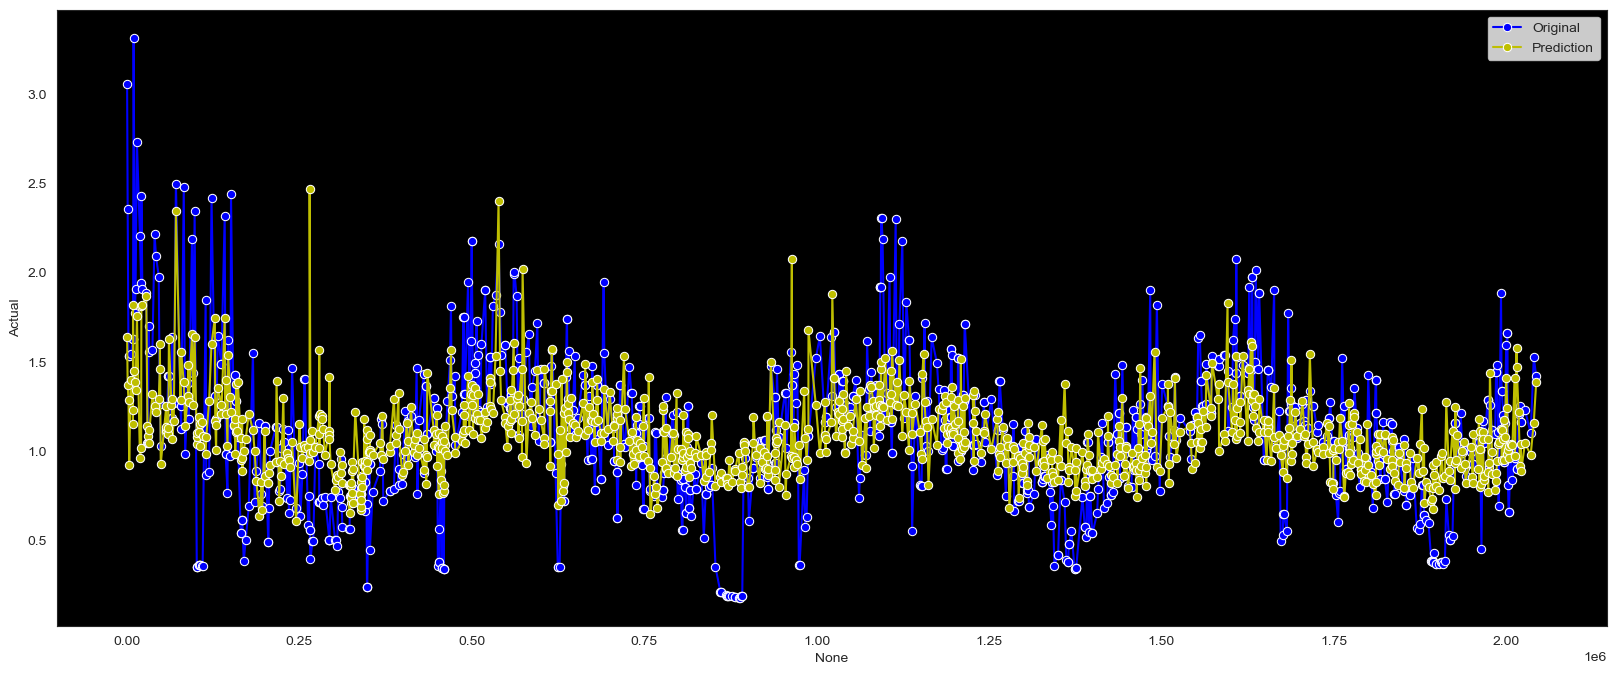

In [100]:
# Actual Value vs Predicted Value:
pred_data_head = pred_data.head(1000)
f,ax = plt.subplots(figsize=(20,8))
ax.set_facecolor("black")
sns.lineplot(data = pred_data_head, x=pred_data_head.index, y="Actual",marker="o",label = "Original", color='b')
sns.lineplot(data = pred_data_head, x=pred_data_head.index, y="Pred",marker="o",label = "Prediction", color='y')
plt.legend()
plt.show()


### OLS Regression:

In [107]:
model=sm.OLS(trlab,trdata)
model

In [113]:
model= model.fit()

In [115]:
model.predict(trdata)

1486814    1.180587
1895892    1.101543
1156325    1.340894
837929     1.021612
1028982    0.975468
             ...   
1484807    0.890407
777669     0.800157
1967818    1.478562
1921845    0.922325
1895235    0.920933
Length: 1639424, dtype: float64

In [117]:
tr_pred=model.predict(trdata)
ts_pred=model.predict(tsdata)

In [121]:
root_mean_squared_error(trlab,tr_pred)

0.35477318848085165

In [119]:
root_mean_squared_error(tslab,ts_pred)

0.3557163316623005

In [123]:
pred_data = pd.DataFrame({
    "Actual":tslab,
    "Pred":ts_pred
})
pred_data

Actual      Pred
1654072  1.456342  1.198482
1397145  0.750415  0.906263
2015040  0.898124  1.644077
1596736  1.113981  1.416458
1244019  1.050557  1.252784
...           ...       ...
813351   1.253517  0.991333
43152    1.492137  1.200919
1645090  1.681203  1.292572
1930613  1.106471  1.025594
963266   1.554993  1.066703

[409856 rows x 2 columns]

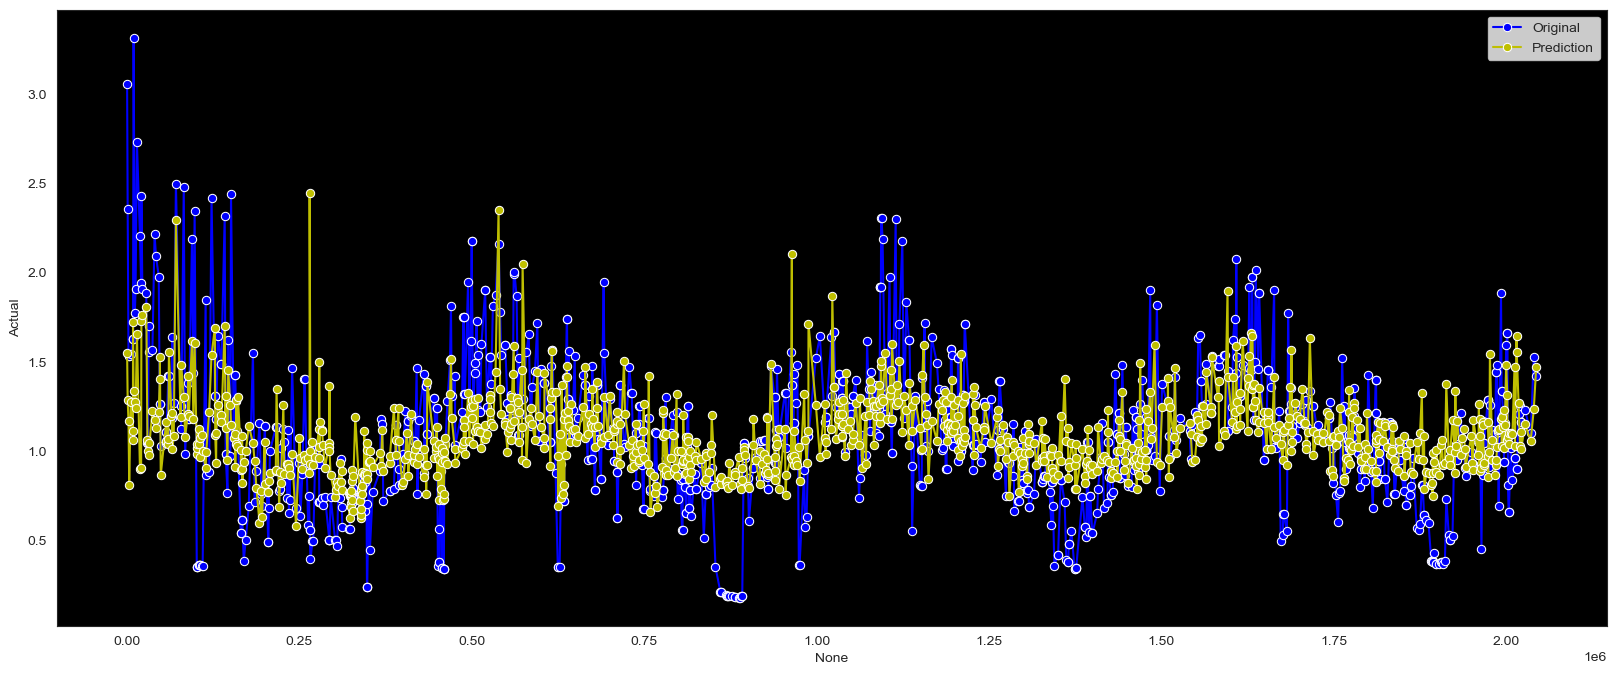

In [125]:
# Actual Value vs Predicted Value:
pred_data_head = pred_data.head(1000)
f,ax = plt.subplots(figsize=(20,8))
ax.set_facecolor("black")
sns.lineplot(data = pred_data_head, x=pred_data_head.index, y="Actual",marker="o",label = "Original", color='b')
sns.lineplot(data = pred_data_head, x=pred_data_head.index, y="Pred",marker="o",label = "Prediction", color='y')
plt.legend()
plt.show()

### Decision Tree Algorithm:

In [142]:
model=DecisionTreeRegressor()
#Train Model:
model.fit(trdata,trlab)

DecisionTreeRegressor()

In [144]:
#Prediction:
tr_pred=model.predict(trdata)
ts_pred=model.predict(tsdata)

In [146]:
#Validating Performance:
#Training Performance:
tr_error = root_mean_squared_error(trlab, tr_pred)
ts_error = root_mean_squared_error(tslab, ts_pred)
print("Training Performance:")
print("Training Error: ",tr_error,"\nTesting Error: ", ts_error)

Training Performance:
Training Error:  6.258568774448047e-15 
Testing Error:  0.021816633407341725


In [148]:
# As the Training & Testing error are very different, we using Hyper Parameter tuning:
model=DecisionTreeRegressor(max_depth = 2,max_features= 10, random_state=70)
model.fit(trdata,trlab)
tr_pred=model.predict(trdata)
ts_pred=model.predict(tsdata)
tr_error = root_mean_squared_error(trlab, tr_pred)
ts_error = root_mean_squared_error(tslab, ts_pred)
print("Training Performance:")
print("Training Error: ",tr_error,"\nTesting Error: ", ts_error)

Training Performance:
Training Error:  0.37021082539811057 
Testing Error:  0.37118389773324695


### Random Forest Algorithm:

In [155]:
rf_model = RandomForestRegressor(n_estimators=10, random_state = 81)
rf_model.fit(trdata,trlab)

RandomForestRegressor(n_estimators=10, random_state=81)

In [157]:
tr_pred = model.predict(trdata)
ts_pred = model.predict(tsdata)
tr_error = root_mean_squared_error(trlab, tr_pred)
ts_error = root_mean_squared_error(tslab, ts_pred)
print("Training Error: ",tr_error,"\nTesting Error: ", ts_error)

Training Error:  0.37021082539811057 
Testing Error:  0.37118389773324695


In [159]:
# Fine Tuning by Gridsearch:
parameter = {
    "n_estimators":[10,30,50],
    "max_samples":[2,3,5],
    "max_depth":[1,2,4],
    "max_features":[1,3,5]
    
}
rf = RandomForestRegressor(random_state = 80)
gs_model = GridSearchCV(rf,param_grid=parameter,cv=5,scoring="neg_root_mean_squared_error")

In [161]:
gs_model.fit(trdata,trlab)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=80),
             param_grid={'max_depth': [1, 2, 4], 'max_features': [1, 3, 5],
                         'max_samples': [2, 3, 5],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_root_mean_squared_error')

In [163]:
gs_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=80),
             param_grid={'max_depth': [1, 2, 4], 'max_features': [1, 3, 5],
                         'max_samples': [2, 3, 5],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_root_mean_squared_error')

In [165]:
gs_model.best_estimator_

RandomForestRegressor(max_depth=2, max_features=5, max_samples=3,
                      n_estimators=50, random_state=80)

In [173]:
best_model = gs_model.best_estimator_

In [167]:
gs_model.best_params_

{'max_depth': 2, 'max_features': 5, 'max_samples': 3, 'n_estimators': 50}

In [169]:
gs_model.best_score_

-0.39505244571623355

In [175]:
#prediction:
tr_pred1=best_model.predict(trdata)
ts_pred1=best_model.predict(tsdata)
#performance:
tr_error1 = root_mean_squared_error(trlab, tr_pred1)
ts_error1 = root_mean_squared_error(tslab, ts_pred1)
print("Training Error: ",tr_error1,"\nTesting Error: ", ts_error1)

Training Error:  0.3990684954733159 
Testing Error:  0.4004225195176168


In [177]:
result_avgpower=pd.DataFrame({
    "Model":["Linear Regression","OLS Regression","Decision Tree","Random Forest"],
    "Training":[0.3512,0.3548,0.3702,0.3991],
    "Testing":[0.3522,0.3557,0.3712,0.4004]
    
})

In [179]:
result_avgpower

Model  Training  Testing
0  Linear Regression    0.3512   0.3522
1     OLS Regression    0.3548   0.3557
2      Decision Tree    0.3702   0.3712
3      Random Forest    0.3991   0.4004

## Best Regression is Linear Regression

## Target is Peak_Hour_Avg_Power:

### Linear Regression:

In [185]:
#Split data into value & target:
val=data_ML.drop("Peak_Hour_Avg_Power",axis=1)
val

Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
0                      4.216                  0.418   234.84             0.0   
1                      5.360                  0.436   233.63             0.0   
2                      5.374                  0.498   233.29             0.0   
3                      5.388                  0.502   233.74             0.0   
4                      3.666                  0.528   235.68             0.0   
...                      ...                    ...      ...             ...   
2049275                0.946                  0.000   240.43             0.0   
2049276                0.944                  0.000   240.00             0.0   
2049277                0.938                  0.000   239.82             0.0   
2049278                0.934                  0.000   239.70             0.0   
2049279                0.932                  0.000   239.55             0.0   

         Sub_metering_2  Sub_metering_3  Month  Year  Day  Daily_Avg_Power  \
0                   1.0            17.0     12  2006   16         3.053475   
1                   1.0            16.0     12  2006   16         3.053475   
2                   2.0            17.0     12  2006   16         3.053475   
3                   1.0            17.0     12  2006   16         3.053475   
4                   1.0            17.0     12  2006   16         3.053475   
...                 ...             ...    ...   ...  ...              ...   
2049275             0.0             0.0     11  2010   26         1.178230   
2049276             0.0             0.0     11  2010   26         1.178230   
2049277             0.0             0.0     11  2010   26         1.178230   
2049278             0.0             0.0     11  2010   26         1.178230   
2049279             0.0             0.0     11  2010   26         1.178230   

         Hour  
0          17  
1          17  
2          17  
3          17  
4          17  
...       ...  
2049275    20  
2049276    20  
2049277    21  
2049278    21  
2049279    21  

[2049280 rows x 11 columns]

In [187]:
tar=data_ML["Peak_Hour_Avg_Power"]
tar

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
2049275    1.163700
2049276    1.163700
2049277    0.934667
2049278    0.934667
2049279    0.934667
Name: Peak_Hour_Avg_Power, Length: 2049280, dtype: float64

In [189]:
train_test_split(val, tar, test_size=0.20,random_state=67)
trdata1,tsdata1,trlab1,tslab1 = train_test_split(val, tar, test_size = 0.20, random_state= 67)

In [191]:
trdata1.shape

(1639424, 11)

In [193]:
tsdata1.shape

(409856, 11)

In [197]:
trlab1.shape

(1639424,)

In [199]:
tslab1.shape

(409856,)

In [201]:
# Model Building:
model1=LinearRegression()
model1

LinearRegression()

In [203]:
model1.fit(trdata1,trlab1)

LinearRegression()

In [205]:
#Prediction:
tr_pred1=model1.predict(trdata1)
ts_pred1=model1.predict(tsdata1)

In [207]:
#Validating Performance:
#Training Performance:
mean_squared_error(trlab1,tr_pred1)

0.3427360618788638

In [209]:
root_mean_squared_error(trlab1,tr_pred1)

0.5854366420705692

In [211]:
# Testing Performance:
mean_squared_error(tslab1,ts_pred1)

0.3425751596931039

In [213]:
root_mean_squared_error(tslab1,ts_pred1)

0.5852992052729133

In [215]:
pred_data1 = pd.DataFrame({
    "Actual":tslab1,
    "Pred":ts_pred1
})
pred_data1

Actual      Pred
1654072  0.000000  0.048650
1397145  0.414067  0.523724
2015040  0.000000  0.353953
1596736  0.000000 -0.049282
1244019  0.000000  0.793324
...           ...       ...
813351   0.000000 -0.243201
43152    0.000000  0.424227
1645090  0.000000 -0.265992
1930613  0.549433  0.768860
963266   0.000000  0.131552

[409856 rows x 2 columns]

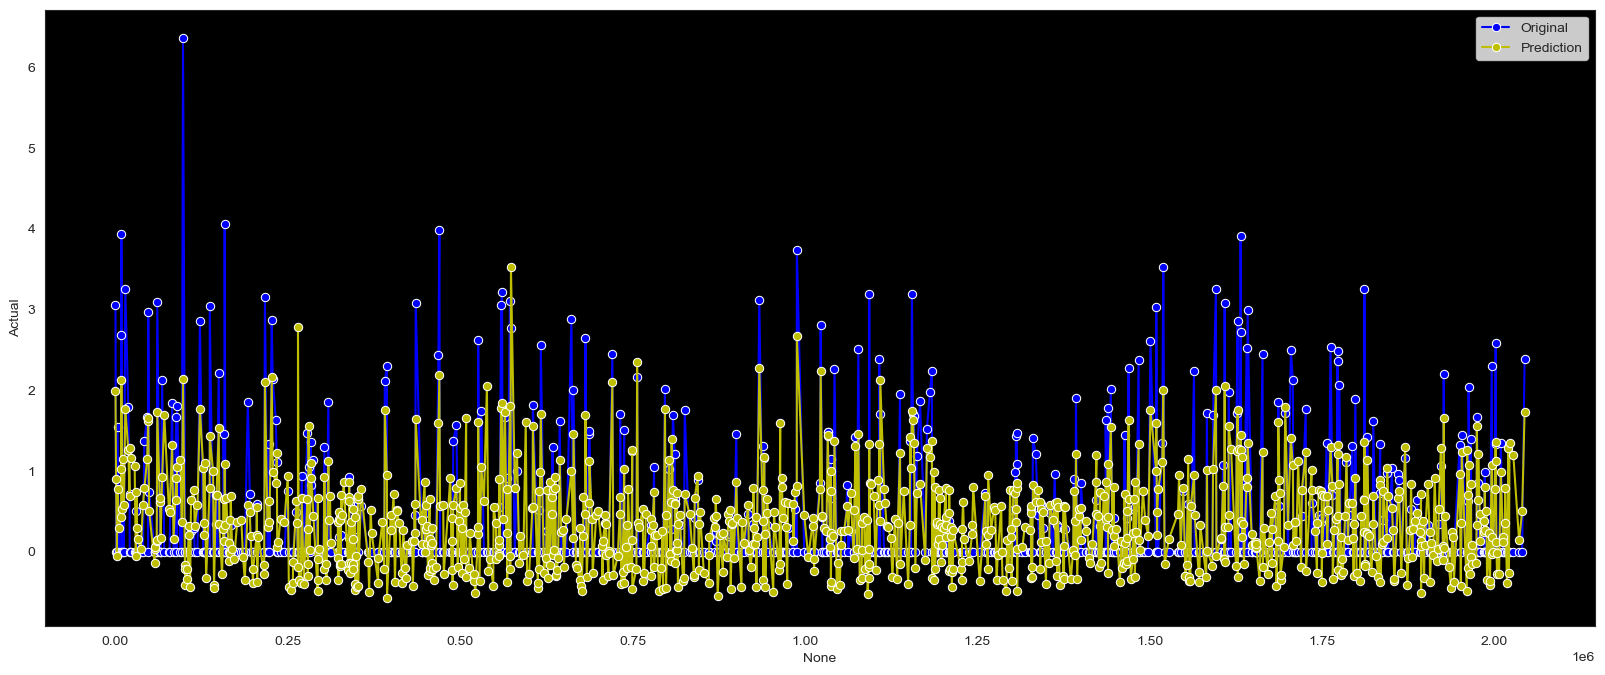

In [219]:
# Actual Value vs Predicted Value:
pred_data_head1 = pred_data1.head(1000)
f,ax = plt.subplots(figsize=(20,8))
ax.set_facecolor("black")
sns.lineplot(data = pred_data_head1, x=pred_data_head1.index, y="Actual",marker="o",label = "Original", color='b')
sns.lineplot(data = pred_data_head1, x=pred_data_head1.index, y="Pred",marker="o",label = "Prediction", color='y')
plt.legend()
plt.show()


### OLS Regression:

In [225]:
model1=sm.OLS(trlab1,trdata1)
model1

In [227]:
model1= model1.fit()

In [229]:
model1.predict(trdata1)

1486814   -0.543555
1895892    0.440002
1156325    0.437966
837929    -0.040413
1028982   -0.323070
             ...   
1484807    0.411155
777669     0.143436
1967818    0.721958
1921845    0.374696
1895235   -0.173797
Length: 1639424, dtype: float64

In [231]:
tr_pred1=model1.predict(trdata1)
ts_pred1=model1.predict(tsdata1)

In [233]:
root_mean_squared_error(trlab1,tr_pred1)

0.58561956407252

In [235]:
root_mean_squared_error(tslab1,ts_pred1)

0.585464158771594

In [237]:
pred_data1 = pd.DataFrame({
    "Actual":tslab1,
    "Pred":ts_pred1
})
pred_data1

Actual      Pred
1654072  0.000000  0.030367
1397145  0.414067  0.520458
2015040  0.000000  0.339098
1596736  0.000000 -0.056924
1244019  0.000000  0.781704
...           ...       ...
813351   0.000000 -0.237080
43152    0.000000  0.451091
1645090  0.000000 -0.284891
1930613  0.549433  0.747595
963266   0.000000  0.133370

[409856 rows x 2 columns]

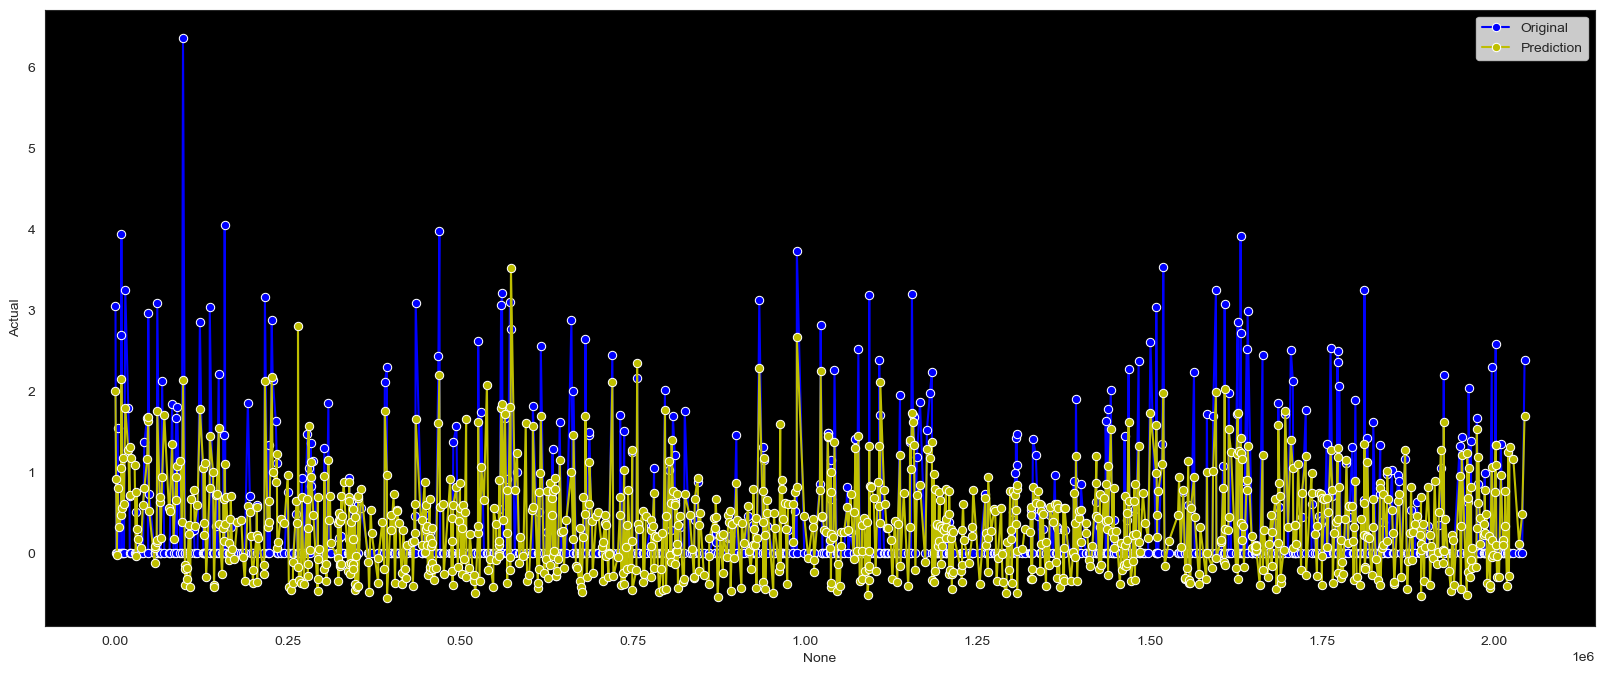

In [239]:
# Actual Value vs Predicted Value:
pred_data_head1 = pred_data1.head(1000)
f,ax = plt.subplots(figsize=(20,8))
ax.set_facecolor("black")
sns.lineplot(data = pred_data_head1, x=pred_data_head1.index, y="Actual",marker="o",label = "Original", color='b')
sns.lineplot(data = pred_data_head1, x=pred_data_head1.index, y="Pred",marker="o",label = "Prediction", color='y')
plt.legend()
plt.show()

### Decision Tree:

In [244]:
model1=DecisionTreeRegressor()
#Train Model:
model1.fit(trdata1,trlab1)

DecisionTreeRegressor()

In [246]:
#Prediction:
tr_pred1=model1.predict(trdata1)
ts_pred1=model1.predict(tsdata1)

In [248]:
#Validating Performance:
#Training Performance:
tr_error1 = root_mean_squared_error(trlab1, tr_pred1)
ts_error1 = root_mean_squared_error(tslab1, ts_pred1)
print("Training Performance:")
print("Training Error: ",tr_error1,"\nTesting Error: ", ts_error1)

Training Performance:
Training Error:  1.4312332023163817e-16 
Testing Error:  0.13101402234486342


In [250]:
# As the Training & Testing error are very different, we using Hyper Parameter tuning:
model=DecisionTreeRegressor(max_depth =4,max_features= 50, random_state=70)
model.fit(trdata1,trlab1)
tr_pred1=model.predict(trdata1)
ts_pred1=model.predict(tsdata1)
tr_error1 = root_mean_squared_error(trlab1, tr_pred1)
ts_error1 = root_mean_squared_error(tslab1, ts_pred1)
print("Training Performance:")
print("Training Error: ",tr_error1,"\nTesting Error: ", ts_error1)

Training Performance:
Training Error:  0.2811282945775317 
Testing Error:  0.2807784978679471


### Random Forest:

In [253]:
rf_model1 = RandomForestRegressor(n_estimators=20, random_state = 81)
rf_model1.fit(trdata1,trlab1)

RandomForestRegressor(n_estimators=20, random_state=81)

In [255]:
tr_pred1 = model.predict(trdata1)
ts_pred1 = model.predict(tsdata1)
tr_error1 = root_mean_squared_error(trlab1, tr_pred1)
ts_error1 = root_mean_squared_error(tslab1, ts_pred1)
print("Training Error: ",tr_error1,"\nTesting Error: ", ts_error1)

Training Error:  0.2811282945775317 
Testing Error:  0.2807784978679471


In [259]:
# Fine Tuning by Gridsearch:
parameter = {
    "n_estimators":[10,30,50,80],
    "max_samples":[2,3,5,7],
    "max_depth":[1,2,4,6],
    "max_features":[1,3,5,7]
    
}
rf = RandomForestRegressor(random_state = 80)
gs_model1 = GridSearchCV(rf,param_grid=parameter,cv=5,scoring="neg_root_mean_squared_error")

In [261]:
gs_model1.fit(trdata1,trlab1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=80),
             param_grid={'max_depth': [1, 2, 4, 6],
                         'max_features': [1, 3, 5, 7],
                         'max_samples': [2, 3, 5, 7],
                         'n_estimators': [10, 30, 50, 80]},
             scoring='neg_root_mean_squared_error')

In [263]:
gs_model1

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=80),
             param_grid={'max_depth': [1, 2, 4, 6],
                         'max_features': [1, 3, 5, 7],
                         'max_samples': [2, 3, 5, 7],
                         'n_estimators': [10, 30, 50, 80]},
             scoring='neg_root_mean_squared_error')

In [267]:
gs_model1.best_estimator_

RandomForestRegressor(max_depth=4, max_features=7, max_samples=7,
                      n_estimators=30, random_state=80)

In [269]:
best_model1 = gs_model1.best_estimator_

In [271]:
gs_model1.best_params_

{'max_depth': 4, 'max_features': 7, 'max_samples': 7, 'n_estimators': 30}

In [275]:
#prediction:
tr_pred2=best_model1.predict(trdata1)
ts_pred2=best_model1.predict(tsdata1)
#performance:
tr_error2 = root_mean_squared_error(trlab1, tr_pred2)
ts_error2 = root_mean_squared_error(tslab1, ts_pred2)
print("Training Error: ",tr_error2,"\nTesting Error: ", ts_error2)

Training Error:  0.6111016523037732 
Testing Error:  0.6104410230553426


In [277]:
result_avgpeak=pd.DataFrame({
    "Model":["Linear Regression","OLS Regression","Decision Tree","Random Forest"],
    "Training":[0.5854,0.5856,0.2811,0.6111],
    "Testing":[0.5853,0.5855,0.2808,0.6104]
    
})

In [279]:
result_avgpeak

Model  Training  Testing
0  Linear Regression    0.5854   0.5853
1     OLS Regression    0.5856   0.5855
2      Decision Tree    0.2811   0.2808
3      Random Forest    0.6111   0.6104

## Best Regression for Avg_PeakHour is Decision Tree